In [1]:
# RNN - best for time series, sentences, audio, car trajectories, music, where the next object depends on previous
# Recurrent neurons send output back into itself
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

x = np.linspace(0,50,501)
y = np.sin(x)

In [2]:
import seaborn as sns

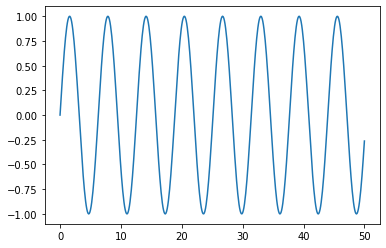

In [5]:
plt.plot(x,y)

In [6]:
df = pd.DataFrame(data=y, index=x, columns=['Sine'])

In [7]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [8]:
len(df)

501

In [9]:
test_percent = 0.1

In [10]:
len(df)*test_percent

50.1

In [11]:
test_point = np.round(len(df)*test_percent)

In [12]:
test_point

50.0

In [17]:
test_ind = int(len(df)-test_point)

In [18]:
test_ind

451

In [19]:
train = df.iloc[:test_ind]

In [20]:
test = df.iloc[test_ind:]

In [21]:
train

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208


In [22]:
test

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [24]:
scaled_train = scaler.transform(train)

In [25]:
scaled_test = scaler.transform(test)

In [26]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [27]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module tensorflow.python.keras.preprocessing.sequence:

class TimeseriesGenerator(keras_preprocessing.sequence.TimeseriesGenerator, tensorflow.python.keras.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  # Arguments
 |      data: Indexable generator (such as list or Numpy array)
 |          containing consecutive data points (timesteps).
 |          The data should be at 2D, and axis 0 is expected
 |          to be the time dimension.
 |      targets: Targets corresponding to timesteps in `data`.
 |          It should have same length as `data`.
 | 

In [41]:
length = 25
batch_size = 1

generator = TimeseriesGenerator(scaled_train, scaled_train,
                               length=length, batch_size=batch_size)

len(scaled_train)

451

In [42]:
len(generator)

426

In [43]:
X,y = generator[0]

In [44]:
X

array([[[0.49999912],
        [0.54991622],
        [0.59933458],
        [0.64776041],
        [0.69470985],
        [0.73971381],
        [0.78232262],
        [0.82211054],
        [0.85868004],
        [0.89166571],
        [0.92073798],
        [0.94560637],
        [0.9660224 ],
        [0.98178208],
        [0.99272794],
        [0.99875061],
        [0.99978993],
        [0.9958355 ],
        [0.98692684],
        [0.97315296],
        [0.95465148],
        [0.93160726],
        [0.90425056],
        [0.87285471],
        [0.83773342]]])

In [45]:
y

array([[0.79923759]])

In [46]:
# scaled_train

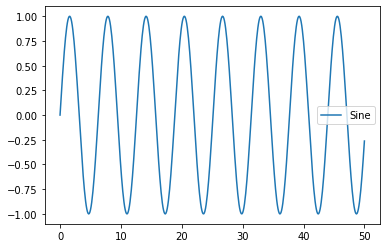

In [47]:
df.plot()

In [48]:
length = 50
batch_size = 1

generator = TimeseriesGenerator(scaled_train, scaled_train,
                               length=length, batch_size=batch_size)

len(scaled_train)

451

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [50]:
n_features=1

In [52]:
model = Sequential()

model.add(SimpleRNN(50, input_shape=(length, n_features)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.fit_generator(generator, epochs=5)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 401 steps
Epoch 1/5
401/401 [==============================] - 4s 10ms/step - loss: 0.0039
Epoch 2/5
401/401 [==============================] - 3s 8ms/step - loss: 2.7749e-04
Epoch 3/5
401/401 [==============================] - 3s 8ms/step - loss: 8.7728e-05
Epoch 4/5
401/401 [==============================] - 3s 8ms/step - loss: 9.2962e-04
Epoch 5/5
401/401 [==============================] - 3s 8ms/step - loss: 2.3448e-05


In [55]:
losses = pd.DataFrame(model.history.history)

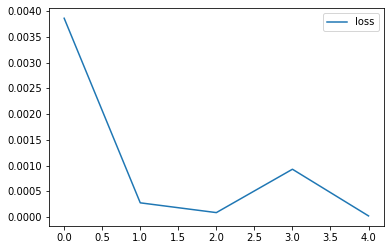

In [56]:
losses.plot()

In [57]:
first_eval_batch = scaled_train[-length:]

In [59]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

In [60]:
model.predict(first_eval_batch)

array([[0.94631237]], dtype=float32)

In [61]:
scaled_test[0]

array([0.94955134])

In [63]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [64]:
predicted_value = [[[99]]]
np.append(current_batch[:,1:,:], predicted_value, axis=1)

array([[[7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.58896644e-01],
        [5.0

In [65]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

In [66]:
test_predictions

[array([0.94631237], dtype=float32),
 array([0.9652901], dtype=float32),
 array([0.9789234], dtype=float32),
 array([0.986456], dtype=float32),
 array([0.98964727], dtype=float32),
 array([0.98727953], dtype=float32),
 array([0.9801707], dtype=float32),
 array([0.9679108], dtype=float32),
 array([0.9508329], dtype=float32),
 array([0.92977816], dtype=float32),
 array([0.9039719], dtype=float32),
 array([0.8741588], dtype=float32),
 array([0.84120166], dtype=float32),
 array([0.8048057], dtype=float32),
 array([0.76534444], dtype=float32),
 array([0.723322], dtype=float32),
 array([0.67949706], dtype=float32),
 array([0.63372284], dtype=float32),
 array([0.5863992], dtype=float32),
 array([0.53837085], dtype=float32),
 array([0.48940054], dtype=float32),
 array([0.44068724], dtype=float32),
 array([0.39199036], dtype=float32),
 array([0.34421653], dtype=float32),
 array([0.297963], dtype=float32),
 array([0.25334653], dtype=float32),
 array([0.21138534], dtype=float32),
 array([0.172471

In [67]:
scaled_test

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


In [68]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions

C:\Users\John Lang\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [69]:
test

,Sine,Predictions
45.1,0.899097,0.892619
45.2,0.938307,0.930575
45.3,0.968142,0.957841
45.4,0.988304,0.972906
45.5,0.998591,0.979288
45.6,0.998900,0.974553
45.7,0.989229,0.960336
45.8,0.969673,0.935816
45.9,0.940429,0.901660
46.0,0.901788,0.859551


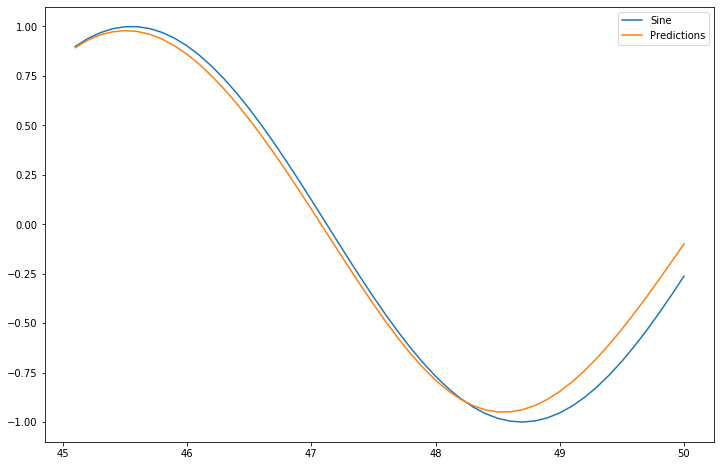

In [70]:
test.plot(figsize=(12,8))

In [71]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience=2)

In [73]:
length = 49
generator = TimeseriesGenerator(scaled_train, scaled_train,
                               length = length,
                               batch_size=1)

validation_generator = TimeseriesGenerator(scaled_test, scaled_test,
                                           length=length,
                                           batch_size=1)

In [74]:
model = Sequential()

model.add(LSTM(50, input_shape=(length, n_features)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [75]:
model.fit_generator(generator, epochs=20, validation_data = validation_generator,
                   callbacks=[early_stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 402 steps, validate for 1 steps
Epoch 1/20
402/402 [==============================] - 8s 19ms/step - loss: 0.0157 - val_loss: 6.8155e-05
Epoch 2/20
402/402 [==============================] - 6s 14ms/step - loss: 9.8175e-05 - val_loss: 6.7209e-05
Epoch 3/20
402/402 [==============================] - 6s 14ms/step - loss: 1.4024e-04 - val_loss: 9.7362e-05
Epoch 4/20
402/402 [==============================] - 6s 14ms/step - loss: 2.1860e-04 - val_loss: 2.7905e-05
Epoch 5/20
402/402 [==============================] - 6s 14ms/step - loss: 1.2686e-04 - val_loss: 1.4135e-05
Epoch 6/20
402/402 [==============================] - 6s 14ms/step - loss: 3.9463e-04 - val_loss: 3.7155e-05
Epoch 7/20
402/402 [==============================] - 6s 14ms/step - loss: 1.7072e-04 - val_loss: 4.9217e-08
Epoch 8/20
402/402 [==============================] - 6s 14ms/step - loss: 5.4063e-05 - val_loss: 3.2210e-06
Epoch 9/20
402/402 [====================

In [76]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

C:\Users\John Lang\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


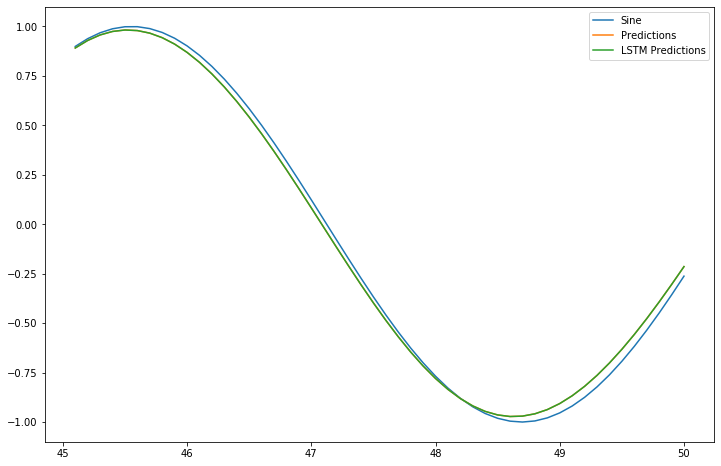

In [79]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions
test.plot(figsize=(12,8))

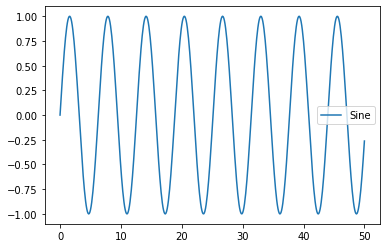

In [78]:
df.plot()

In [80]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

length = 50 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [81]:
model = Sequential()
model.add(LSTM(50, input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit_generator(generator,epochs=6)

  ...
    to  
  ['...']
Train for 451 steps
Epoch 1/6
451/451 [==============================] - 8s 18ms/step - loss: 0.0133
Epoch 2/6
451/451 [==============================] - 6s 14ms/step - loss: 1.6960e-04
Epoch 3/6
451/451 [==============================] - 6s 14ms/step - loss: 2.0583e-04
Epoch 4/6
451/451 [==============================] - 6s 14ms/step - loss: 1.3430e-04
Epoch 5/6
451/451 [==============================] - 6s 14ms/step - loss: 1.2661e-04
Epoch 6/6
451/451 [==============================] - 6s 14ms/step - loss: 3.0148e-04


In [82]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [83]:
forecast = scaler.inverse_transform(forecast)

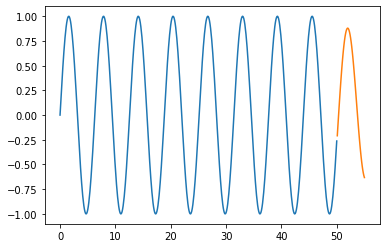

In [84]:
len(forecast)

forecast_index = np.arange(50.1,55.1,step=0.1)
plt.plot(df.index,df['Sine'])
plt.plot(forecast_index,forecast)